In [10]:
import matplotlib.pyplot as plt

import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers
from keras.datasets import mnist

In [2]:
# Loads the training and test data sets (ignoring class labels)
(x_train, _), (x_test, _) = mnist.load_data()

# Scales the training and test data to range between 0 and 1.
max_value = float(x_train.max())
x_train = x_train.astype('float32') / max_value
x_test = x_test.astype('float32') / max_value

x_train.shape, x_test.shape



((60000, 28, 28), (10000, 28, 28))

In [3]:
#To work with the images as vectors, let’s reshape the 3D arrays as matrices. 
#In doing so, we’ll reshape the 28 x 28 images into vectors of length 784.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

(x_train.shape, x_test.shape)

((60000, 784), (10000, 784))

In [4]:
#Define the model architecture
input_dim = x_train.shape[1]
encoding_dim = 32

autoencoder = Sequential()
autoencoder.add(Dense(encoding_dim, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))
#Display a textual summary of the architecture
autoencoder.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [5]:
#If you are interested in exploring the encoder, you
#can easily extract it from the model

#Need a dummy image to get the layer out (for the sizes)
input_img = Input(shape=(input_dim,)) 
encoder_layer = autoencoder.layers[0]
encoder = Model(input_img, encoder_layer(input_img))
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [6]:
#Compile the model given the structure, the optimizer and the loss
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
#Epochs need to be far more than 10 but takes time
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.2751 - val_loss: 0.1910
Epoch 2/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.1711 - val_loss: 0.1529
Epoch 3/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.1438 - val_loss: 0.1334
Epoch 4/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.1284 - val_loss: 0.1212
Epoch 5/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.1184 - val_loss: 0.1130
Epoch 6/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.1117 - val_loss: 0.1076
Epoch 7/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.1068 - val_loss: 0.1033
Epoch 8/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.1030 - val_loss: 0.1000
Epoch 9/10
60000/60000 [==============================] - 2s 3

In [8]:
#Test the resulting autoencoder
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

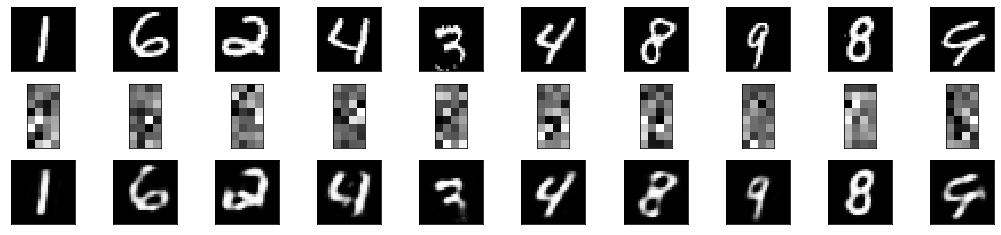

In [11]:
#Do some plotting of the results
plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

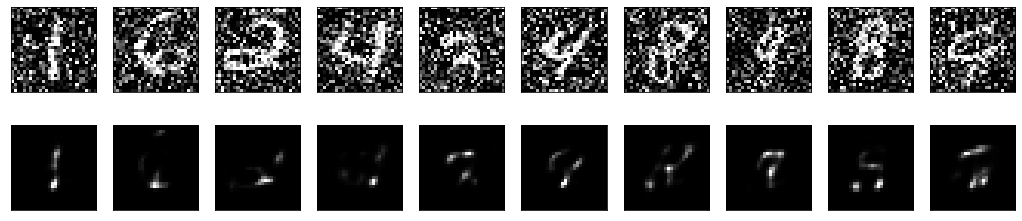

In [12]:
#Lets try adding some noise
x_train_noisy = x_train + np.random.normal(loc=0.0, scale=0.5, size=x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

x_test_noisy = x_test + np.random.normal(loc=0.0, scale=0.5, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Now repeat the test above
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

# Denoise test images
x_test_denoised = autoencoder.predict(x_test_noisy)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test_noisy[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(x_test_denoised[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
#Need the denoising approach:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.1521 - val_loss: 0.1350
Epoch 2/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1340 - val_loss: 0.1302
Epoch 3/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1305 - val_loss: 0.1278
Epoch 4/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.1285 - val_loss: 0.1263
Epoch 5/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.1272 - val_loss: 0.1253
Epoch 6/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.1263 - val_loss: 0.1247
Epoch 7/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.1257 - val_loss: 0.1242
Epoch 8/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.1253 - val_loss: 0.1239
Epoch 9/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.1249 - val_loss: 0.1235
Epoch

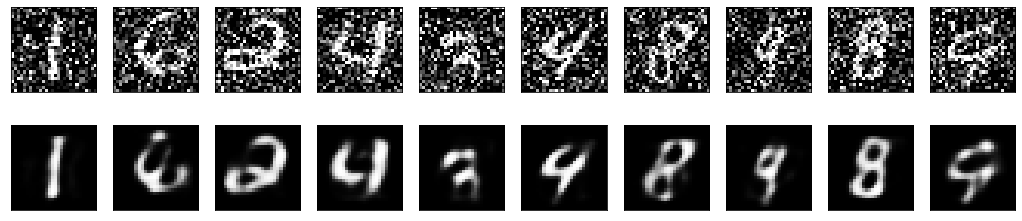

In [14]:
#...and test again!
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

# Denoise test images
x_test_denoised = autoencoder.predict(x_test_noisy)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test_noisy[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(x_test_denoised[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()